# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Загрузка данных и первичный анализ

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную `data`.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Выведим первые 20 строчек датафрейма `data` на экран.

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведим основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сохраним описание данных для лучшего понимания.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построим общую гистограмму для всех столбцов `data` c помощью метода `.hist()`.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

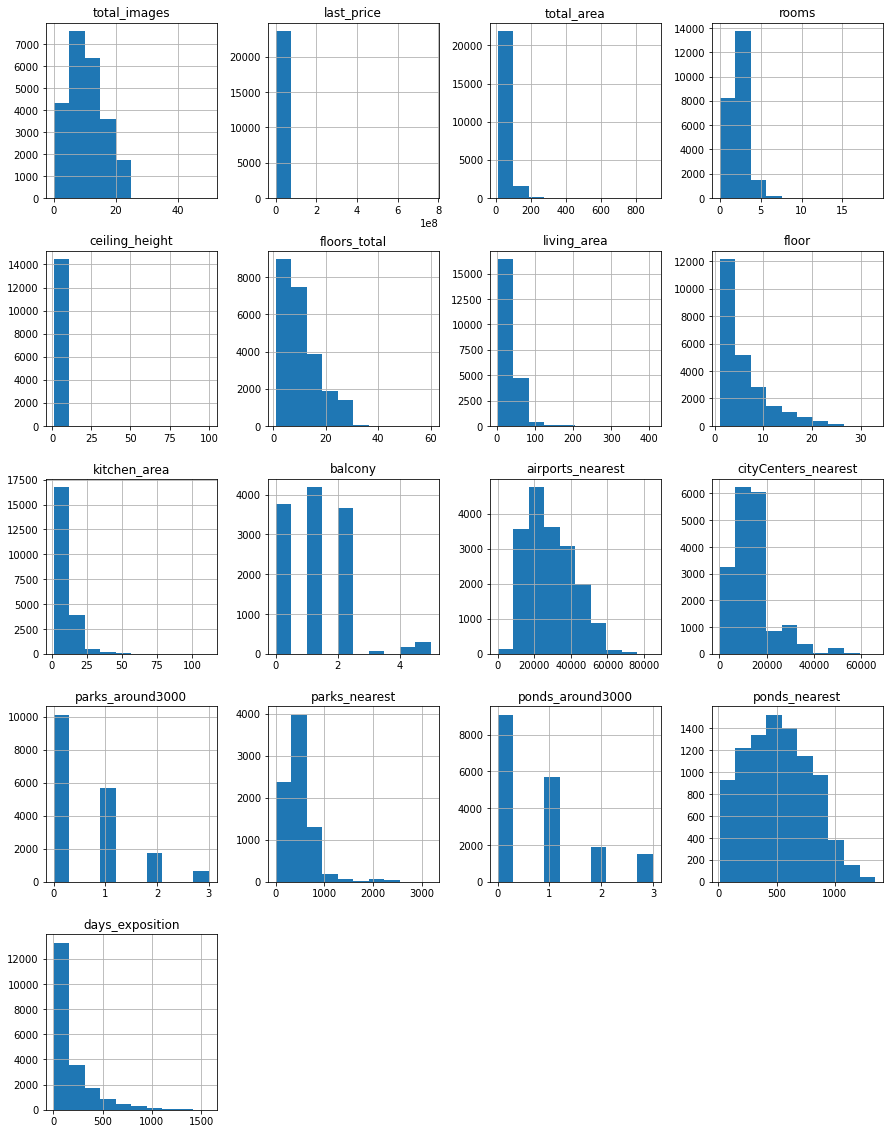

In [6]:
data.hist(figsize=(15, 20))

**Промежуточный вывод.** Все данные загружаются нормально. Основная информация выведена на экран.  Общие гистограммы построены.

## Предобработка данных

### Удаление пропусков

Выведим количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Таким образом, нужно поробовать заполнить пропуски в 14 столбцах.

#### Удаление пропусков в `ceiling_height`

Перед тем, как заполнить пропуски в `ceiling_height` необходимо избавиться от аномальных значений в этом столбйе.

<AxesSubplot:>

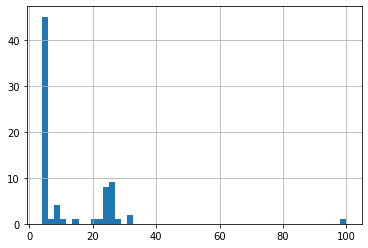

In [8]:
data.query('ceiling_height > 4')['ceiling_height'].hist(bins=50)

In [9]:
data.query('ceiling_height > 4')['ceiling_height'].unique()

array([  4.15,  25.  ,   5.2 ,   5.3 ,   5.  ,   4.06,   4.7 ,   5.6 ,
         4.19,   4.8 ,   4.5 ,   4.2 ,  32.  ,   8.  ,   4.37,  27.  ,
         4.1 ,  24.  ,  26.  ,   8.3 ,   4.4 ,   4.45,   5.5 ,   4.3 ,
         4.65,  14.  ,   4.14,   4.25,  20.  ,   6.  ,  22.6 ,   5.8 ,
        27.5 ,   4.9 ,  10.3 , 100.  ])

Ясно, что аномально большие значения в `25`, `32` или `100` - это ошибки в единицах измеркемя. Поделим все значения больше 5 метров на 10, а дно значение в 100 на 100. Для этого создадим функцию `ceiling_height_correction`.

In [10]:
def ceiling_height_correction(ceiling_height):
    try:
        if ceiling_height >= 100:
            return ceiling_height / 100
        if ceiling_height > 5:
            return ceiling_height / 10
        else:
            return ceiling_height
    except:
        pass
    
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_correction)

Проверим результат.

<AxesSubplot:>

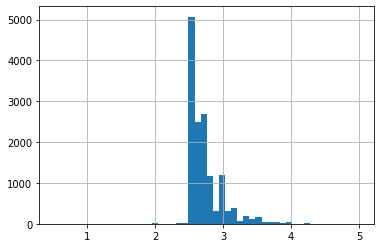

In [11]:
data['ceiling_height'].hist(bins=50)

Теперь распрелеоение выглядит более реалистично. Теперь можем запонить пропуски на медианные значения.

In [12]:
# заполним пропуски в категрии 'ceiling_height' на медианное
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Всё, идём дальше.

#### Удаление пропусков в `floors_total`

<AxesSubplot:>

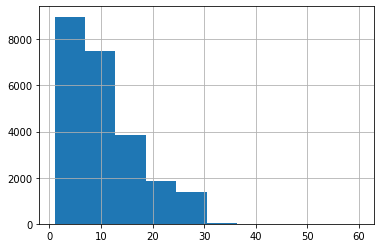

In [13]:
data['floors_total'].hist()

<AxesSubplot:>

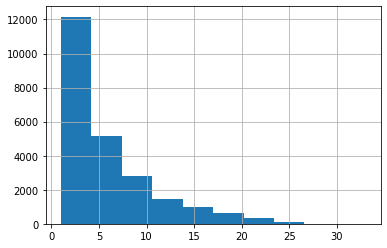

In [14]:
data['floor'].hist()

In [15]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Каких-либо аномальных значений не наблюдается. Самое высокое задние в Санкт-Петербурге имеет около 90 этажей. Следовательно, значение в 60 этажей - вполне реалестично. Значит мы можем заменить пропущённые значения на медаанные.

In [16]:
# получаем удианное значение общего числа этажей
median_floor = data['floors_total'].median()

Но перед этим потмотрим, как связаны между собой `floors_total` и `floor`.

<AxesSubplot:xlabel='floors_total', ylabel='floor'>

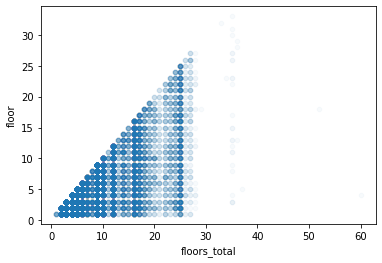

In [17]:
data.plot(x='floors_total', y='floor', kind='scatter', alpha=0.03125)

Совершенно естественно, что `floor` не превышает `floors_total`, благодаря чему всте точки расположены под диагональю биссектрисы. Следовательно, при замене это нужно будет соблюсти.

In [18]:
# функция для воссоздания living_area по kitchen_area
def floor_correction(row):
    floor=row['floor']
    floors_total=row['floors_total']
    
    if np.isnan(floors_total):
        if floor > median_floor:
            return floor
        else:
            return median_floor
    else:
        return floors_total

new_floors = data.apply(floor_correction,axis=1)
data['floors_total']=new_floors

Посмотрим на график расеяния этажей.

<AxesSubplot:xlabel='floors_total', ylabel='floor'>

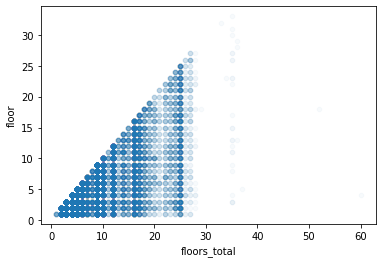

In [19]:
data.plot(x='floors_total', y='floor', kind='scatter', alpha=0.03125)

Всё, идём дальше.

#### Удаление пропусков в `living_area` и `kitchen_area`

Посмотрим на данные.

In [20]:
condition_1 = (data['living_area'].isna()) & (~ data['kitchen_area'].isna())
condition_2 = (~ data['living_area'].isna()) & (data['kitchen_area'].isna())
condition_3 =  (~ data['living_area'].isna()) & (~ data['kitchen_area'].isna())
condition_4 = (data['living_area'].isna()) & (data['kitchen_area'].isna())
print('С жилой площадью, но без кухни ', condition_1.sum())
print('С площадью кухни, но без жилой ', condition_2.sum())
print('С обеими площадями ', condition_3.sum())
print('Без площадей ', condition_4.sum())

С жилой площадью, но без кухни  439
С площадью кухни, но без жилой  814
С обеими площадями  20982
Без площадей  1464


Поскольку в столбце `total_area` нет пропусков, то зечения в стольцах `living_area` и `kitchen_area` можно получить, вычтя другое значение площади, есои рдер из начений площади пропущено, а другое - нет. Напишем соответствующие функции `living_area_correction` и `kitchen_area_correction`.

In [21]:
# функция для воссоздания living_area по kitchen_area
def living_area_correction(row):
    living_area=row['living_area']
    kitchen_area=row['kitchen_area']
    total_area=row['total_area']
    
    if np.isnan(living_area) and not np.isnan(kitchen_area):
        return total_area - kitchen_area
    else:
        return living_area

new_area = data.apply(living_area_correction,axis=1)

data['living_area']=new_area

In [22]:
# функция для воссоздания kitchen_area по living_area
def kitchen_area_correction(row):
    living_area=row['living_area']
    kitchen_area=row['kitchen_area']
    total_area=row['total_area']
    
    if not np.isnan(living_area) and np.isnan(kitchen_area):
        return total_area - living_area
    else:
        return kitchen_area

new_area = data.apply(kitchen_area_correction,axis=1)

data['kitchen_area']=new_area

Проверяем результаты.

In [23]:
condition_1 = (data['living_area'].isna()) & (~ data['kitchen_area'].isna())
condition_2 = (~ data['living_area'].isna()) & (data['kitchen_area'].isna())
condition_3 =  (~ data['living_area'].isna()) & (~ data['kitchen_area'].isna())
condition_4 = (data['living_area'].isna()) & (data['kitchen_area'].isna())
print('С жилой площадью, но без кухни ', condition_1.sum())
print('С площадью кухни, но без жилой ', condition_2.sum())
print('С обеими площадями ', condition_3.sum())
print('Без площадей ', condition_4.sum())

С жилой площадью, но без кухни  0
С площадью кухни, но без жилой  0
С обеими площадями  22235
Без площадей  1464


Все пропуски, которые можно было восполнить таким образом, заполнены. Осталось 1464 пропуска.

Посмотрим на диаграммы рассеяния площадей.

<AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>

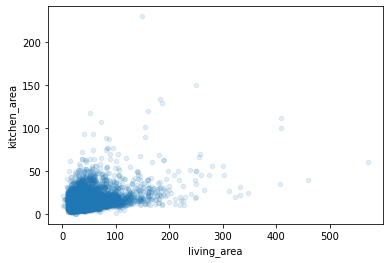

In [24]:
data.plot(x='living_area', y='kitchen_area', kind='scatter', alpha=0.125)

Нет чёткой зависимости между `living_area` и `kitchen_area`.

<AxesSubplot:xlabel='living_area', ylabel='total_area'>

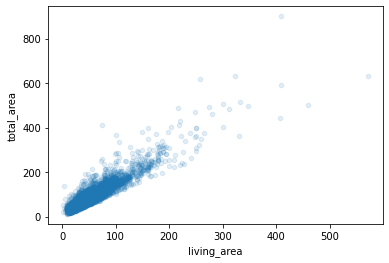

In [25]:
data.plot(x='living_area', y='total_area', kind='scatter', alpha=0.125)

Есть небольшая зависимость между `living_area` и `total_area`.

<AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>

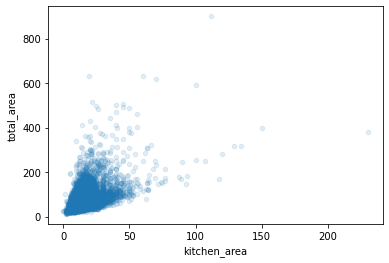

In [26]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', alpha=0.125)

Нет чёткой зависимости между `kitchen_area` и `total_area`.

In [27]:
print('Корреляция total_area и living_area', data['total_area'].corr(data['living_area']))
print('Корреляция total_area и kitchen_area', data['total_area'].corr(data['kitchen_area']))
print('Корреляция kitchen_area и living_area', data['living_area'].corr(data['kitchen_area']))

Корреляция total_area и living_area 0.934872131549775
Корреляция total_area и kitchen_area 0.5770923696185978
Корреляция kitchen_area и living_area 0.41435502588319856


Наиболее сильная связь между `total_area` и `living_area`. От неё и будем отталкиваться.

In [28]:
percent_living_area = data['living_area'] /  data['total_area']
percent_living_area.describe()

count    22235.000000
mean         0.569293
std          0.109779
min          0.021583
25%          0.497884
50%          0.571429
75%          0.642857
max          1.000000
dtype: float64

Обычно жилая площадь (`living_area`) занимает `56-57%` от общей площади (`total_area`).

In [29]:
percent_kitchen_area = data['kitchen_area'] /  data['total_area']
percent_kitchen_area.describe()

count    22235.000000
mean         0.194318
std          0.083885
min          0.000000
25%          0.134615
50%          0.175439
75%          0.239437
max          0.913043
dtype: float64

Эти данные вполне можно использовать для восстановления пропусков.

In [30]:
kitchen_percent = (data['kitchen_area'] / data['total_area']).median()
living_percent = (data['living_area'] / data['total_area']).median()

print('Медианный процент кухонной площади ', kitchen_percent)
print('Медианный процент жилой площади ', living_percent)

Медианный процент кухонной площади  0.17543859649122806
Медианный процент жилой площади  0.5714285714285713


Заполним пропуски площадей

In [31]:
# заполним пропуски площадей 
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_percent * data['total_area'])
data['living_area'] = data['living_area'].fillna(living_percent * data['total_area'])

Проверим результат.

In [32]:
condition_1 = (data['living_area'].isna()) & (~ data['kitchen_area'].isna())
condition_2 = (~ data['living_area'].isna()) & (data['kitchen_area'].isna())
condition_3 =  (~ data['living_area'].isna()) & (~ data['kitchen_area'].isna())
condition_4 = (data['living_area'].isna()) & (data['kitchen_area'].isna())
print('С жилой площадью, но без кухни ', condition_1.sum())
print('С площадью кухни, но без жилой ', condition_2.sum())
print('С обеими площадями ', condition_3.sum())
print('Без площадей ', condition_4.sum())

С жилой площадью, но без кухни  0
С площадью кухни, но без жилой  0
С обеими площадями  23699
Без площадей  0


Отлично, все пропуски по площадям заполнены.

#### Удаление пропусков в `is_apartment`

In [33]:
# узнаем среднее и медианное значения
print('Среднее значение', data['is_apartment'].mean())
print('Медианное значение', data['is_apartment'].median())

Среднее значение 0.018018018018018018
Медианное значение 0.0


С брльшой долей вероятности можно считать, что если продвавец не указал, яаляется ли недвижимостью то, скорее всего, это квартира. Такие пропуски правильно заменить на `False`.

In [34]:
# заполним пропуски в категрии 'is_apartment' на False
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски по апартаментам заполнены.

#### Удаление пропусков в `balcony`

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [35]:
# заполним пропуски в категрии 'balcony' на ноль
data['balcony'] = data['balcony'].fillna(0)

Пропуски по балконам заполнены. Прекрасно. Идём дальше.

#### Удаление пропусков в `locality_name`

Незвестных названий всего 46. Заменим пропуски соответствующими значениями.

In [36]:
# заполним пропуски в категрии 'locality_name' на 'Неизвестно'
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

Посмотрим, что у нас с названиями наслённых пунктов.

In [37]:
for name in data['locality_name'].sort_values().unique():
    print(name)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Неизвестно
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Саб

In [38]:
print('Названий населённых пунктов с дубликатами', len(data['locality_name'].sort_values().unique()))

Названий населённых пунктов с дубликатами 365


Удалим дублмкаты с различными вариациями слова посёлок (буква `ё`, `коттеджный поселок`, `городского типа`, `при станции`, `поселок при железнодорожной станции` и т.п.). Сделем едмную форму посёлок.

In [39]:
def locality_name(name):
    name = name.replace('ё', 'е')
    name = name.replace('поселок городского типа', 'поселок')
    name = name.replace('городской поселок', 'поселок')
    name = name.replace('поселок станции', 'поселок')
    name = name.replace('поселок при железнодорожной станции', 'поселок')
    name = name.replace('коттеджный поселок', 'поселок')
    return name

data['locality_name'] = data['locality_name'].apply(locality_name)

In [40]:
print('Названий населённых пунктов без дубликатов', len(data['locality_name'].sort_values().unique()))

Названий населённых пунктов без дубликатов 319


In [41]:
print(data['locality_name'].value_counts())

Санкт-Петербург         15721
поселок Мурино            556
поселок Шушары            440
Всеволожск                398
Пушкин                    369
                        ...  
деревня Курковицы           1
деревня Хязельки            1
деревня Зимитицы            1
поселок Севастьяново        1
поселок Кондратьево         1
Name: locality_name, Length: 319, dtype: int64


In [42]:
for name in data['locality_name'].sort_values().unique():
    print(name)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Неизвестно
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалево
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня Бор
деревня Борисова Грива
деревня Ваганово
деревня Вартемяги
деревня Вахнова Кара
деревня Выскатка
деревня Гарболово
деревня Глинка
деревня Горбунки
деревня Гостилицы
деревня Заклинье
деревня Заневка
деревня Зимитицы
деревня Извара
деревня Иссад
деревня Калитино
деревня Кальтино
деревня Камышовка
деревня Каськово
деревня Келози
деревня Кипень
деревня Кисельня
дерев

Попробуем устранить и типы населённых пункиов

In [43]:
def locality_name2(name):
    name = name.replace('поселок ', '')
    name = name.replace('село ', '')
    name = name.replace('садовое товарищество ', '')
    name = name.replace('садоводческое некоммерческое товарищество ', '')
    name = name.replace('деревня ','')
    return name

data['locality_name'] = data['locality_name'].apply(locality_name2)

Смотрим результат.

In [44]:
print('Названий населённых пунктов без типов населённых пункиов', len(data['locality_name'].sort_values().unique()))

Названий населённых пунктов без типов населённых пункиов 306


In [45]:
for name in data['locality_name'].sort_values().unique():
    print(name)

Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жилгородок
Жилпоселок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичево
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Долина
К

In [46]:
print(data['locality_name'].value_counts())

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Семиозерье             1
Курковицы              1
Ромашки                1
Котлы                  1
Ялгино                 1
Name: locality_name, Length: 306, dtype: int64


#### Удаление пропусков в `airports_nearest`

In [47]:
airports_nearest = data.dropna(subset=['airports_nearest'])
airports_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,11.000000,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,90.857143,9,False,...,27.894737,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.000000,2,False,...,6.000000,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.300000,7,False,...,10.600000,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.000000,8,False,...,8.000000,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


Этот признак очень завязан на местоположение. Сгруппируем данные по месту и посчитаем медианные значения.

In [48]:
grouped_data = airports_nearest.groupby('locality_name')
airports_nearest_median = grouped_data['airports_nearest'].agg('median')

In [49]:
airports_nearest_median

locality_name
Александровская    12896.5
Белоостров         57769.0
Зеленогорск        72282.0
Колпино            26232.0
Красное Село       25715.5
Кронштадт          67850.0
Левашово           52693.0
Лисий Нос          55909.0
Ломоносов          48415.5
Металлострой       25758.0
Молодежное         84665.0
Мурино             51553.0
Неизвестно         22041.0
Павловск           20529.5
Парголово          53426.0
Песочный           54831.5
Петергоф           39231.0
Петро-Славянка     20605.0
Понтонный          30642.0
Пушкин             15766.0
Репино             61797.5
Санкт-Петербург    26757.5
Саперный           34147.5
Сестрорецк         56692.0
Стрельна           28317.0
Усть-Ижора         26510.5
Шушары             17427.0
Щеглово            61908.0
Name: airports_nearest, dtype: float64

In [50]:
# выведем значение
airports_nearest_median.loc['Шушары']

17427.0

In [51]:
airports_nearest_median.index

Index(['Александровская', 'Белоостров', 'Зеленогорск', 'Колпино',
       'Красное Село', 'Кронштадт', 'Левашово', 'Лисий Нос', 'Ломоносов',
       'Металлострой', 'Молодежное', 'Мурино', 'Неизвестно', 'Павловск',
       'Парголово', 'Песочный', 'Петергоф', 'Петро-Славянка', 'Понтонный',
       'Пушкин', 'Репино', 'Санкт-Петербург', 'Саперный', 'Сестрорецк',
       'Стрельна', 'Усть-Ижора', 'Шушары', 'Щеглово'],
      dtype='object', name='locality_name')

In [52]:
print('Осталось пропусков', len(data[data['airports_nearest'].isna()]))

Осталось пропусков 5542


In [53]:
print('Количество пропусков, включая известные населённые пунктами: ', data['airports_nearest'].isna().sum())

Количество пропусков, включая известные населённые пунктами:  5542


Заменим медианными из `airports_nearest_median` значениями все значения в датафрейме, если они имеют пропуски в данных.

In [54]:
for t in data['locality_name'].unique():
    if t in airports_nearest_median.index:
        data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = airports_nearest_median.loc[t]

In [55]:
print('Количество пропусков, только с населённые пунктами, для крирпых ект данных: ', data['airports_nearest'].isna().sum())

Количество пропусков, только с населённые пунктами, для крирпых ект данных:  4829


In [56]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.65,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,18.742857,2,False,...,5.754386,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,26.171429,1,False,...,8.035088,0.0,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,False,...,5.500000,0.0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,2.65,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,2.65,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,False,...,27.000000,0.0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
len(airports_nearest['locality_name'])

18157

In [58]:
data['airports_nearest'].mean()

29531.431160572338

<AxesSubplot:>

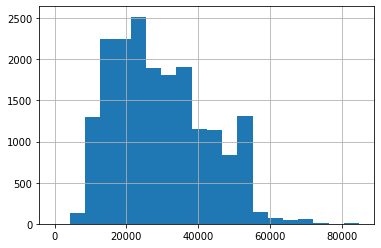

In [59]:
data['airports_nearest'].hist(bins=20)

In [60]:
a = data[data['airports_nearest'].isna()]['locality_name'].unique()
print(len(a), 'населённых пункта без расстояния до аэропорта', a)

278 населённых пункта без расстояния до аэропорта ['Янино-1' 'Сертолово' 'Кудрово' 'Коммунар' 'Красный Бор' 'Гатчина'
 'Федоровское' 'Выборг' 'Кировск' 'Новое Девяткино' 'Лебяжье' 'Сиверский'
 'Молодцово' 'Кузьмоловский' 'Новая Ропша' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Куттузи' 'Аннино' 'Ефимовский'
 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское' 'Сясьстрой' 'Старая'
 'Лесколово' 'Новый Свет' 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург'
 'Никольское' 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Бокситогорск'
 'Лопухинка' 'Пикалево' 'Терволово' 'Советский' 'Подпорожье' 'Петровское'
 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана'
 'Севастьяново' 'Большая Ижора' 'Агалатово' 'Новогорелово' 'Лесогорский'
 'Лаголово' 'Цвелодубово' 'Рахья' 'Белогорка' 'Заводской' 'Новоселье'
 'Большие Колпаны' 'Горбунки' 'Батов

Для этих населённых пунктов заменим пропуски на медианные значения.

In [61]:
# сохраняем медианные значения
airports_median = data['airports_nearest'].median()

# заполним пропуски в категрии 'airports_median' на медианные значения
data['airports_nearest'] = data['airports_nearest'].fillna(airports_median)

Проверяем результат.

In [62]:
print('Количество пропусков, только с населёнными пунктами, для крирпых нет данных: ', data['airports_nearest'].isna().sum())

Количество пропусков, только с населёнными пунктами, для крирпых нет данных:  0


#### Удаление пропусков в `cityCenters_nearest`

In [63]:
cityCenters_nearest = data.dropna(subset=['cityCenters_nearest'])

Этот признак очень завязан на местоположение. Сгруппируем данные и найдём медиану.

In [64]:
grouped_data = cityCenters_nearest.groupby('locality_name')
cityCenters_nearest_median = grouped_data['cityCenters_nearest'].agg('median')

In [65]:
cityCenters_nearest_median

locality_name
Александровская    27468.0
Белоостров         38868.0
Зеленогорск        53381.0
Колпино            32018.0
Красное Село       29140.5
Кронштадт          49575.0
Левашово           25727.0
Лисий Нос          28226.0
Ломоносов          51677.0
Металлострой       27602.0
Молодежное         65764.0
Мурино             21888.0
Неизвестно          8943.0
Павловск           32683.0
Парголово          19311.0
Песочный           26099.5
Петергоф           33771.0
Петро-Славянка     27165.0
Понтонный          32354.0
Пушкин             27930.5
Репино             42896.5
Санкт-Петербург    12244.5
Саперный           35859.5
Сестрорецк         34821.0
Стрельна           23506.0
Усть-Ижора         28222.5
Шушары             24212.0
Щеглово            34085.0
Name: cityCenters_nearest, dtype: float64

In [66]:
cityCenters_nearest_median.index

Index(['Александровская', 'Белоостров', 'Зеленогорск', 'Колпино',
       'Красное Село', 'Кронштадт', 'Левашово', 'Лисий Нос', 'Ломоносов',
       'Металлострой', 'Молодежное', 'Мурино', 'Неизвестно', 'Павловск',
       'Парголово', 'Песочный', 'Петергоф', 'Петро-Славянка', 'Понтонный',
       'Пушкин', 'Репино', 'Санкт-Петербург', 'Саперный', 'Сестрорецк',
       'Стрельна', 'Усть-Ижора', 'Шушары', 'Щеглово'],
      dtype='object', name='locality_name')

In [67]:
print('Количество пропусков, включая известные населённые пунктами: ', data['parks_nearest'].isna().sum())

Количество пропусков, включая известные населённые пунктами:  15620


In [68]:
for t in data['locality_name'].unique():
    if t in cityCenters_nearest_median.index:
        data.loc[(data['locality_name'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = cityCenters_nearest_median.loc[t]

Проверим результат.

In [69]:
print('Количество пропусков, только с населённые пунктами, для крирпых ект данных: ', data['cityCenters_nearest'].isna().sum())

Количество пропусков, только с населённые пунктами, для крирпых ект данных:  4829


In [70]:
с = data[data['cityCenters_nearest'].isna()]['locality_name'].unique()
print(len(a), 'населённых пункта без расстояния до центра', с)

278 населённых пункта без расстояния до центра ['Янино-1' 'Сертолово' 'Кудрово' 'Коммунар' 'Красный Бор' 'Гатчина'
 'Федоровское' 'Выборг' 'Кировск' 'Новое Девяткино' 'Лебяжье' 'Сиверский'
 'Молодцово' 'Кузьмоловский' 'Новая Ропша' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Куттузи' 'Аннино' 'Ефимовский'
 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское' 'Сясьстрой' 'Старая'
 'Лесколово' 'Новый Свет' 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург'
 'Никольское' 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Бокситогорск'
 'Лопухинка' 'Пикалево' 'Терволово' 'Советский' 'Подпорожье' 'Петровское'
 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана'
 'Севастьяново' 'Большая Ижора' 'Агалатово' 'Новогорелово' 'Лесогорский'
 'Лаголово' 'Цвелодубово' 'Рахья' 'Белогорка' 'Заводской' 'Новоселье'
 'Большие Колпаны' 'Горбунки' 'Батово' 

Для этих населённых пунктов заменим пропуски на медианные значения.

In [71]:
# сохраняем медианные значения
cityCenters_median = data['cityCenters_nearest'].median()

# заполним пропуски в категрии 'cityCenters' на медианные значения
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(cityCenters_median)

In [72]:
print('Количество пропусков, только с населённые пунктами, для которых нет данных: ', data['cityCenters_nearest'].isna().sum())

Количество пропусков, только с населённые пунктами, для которых нет данных:  0


#### Удаление пропусков в `'parks_nearest`

In [73]:
parks_nearest = data.dropna(subset=['parks_nearest'])

Этот признак очень завязан на местоположение. Сгруппируем данные и найдём медиану.

In [74]:
grouped_data = parks_nearest.groupby('locality_name')
parks_nearest_median = grouped_data['parks_nearest'].agg('median')

In [75]:
parks_nearest_median

locality_name
Зеленогорск        147.5
Колпино            393.0
Красное Село       428.5
Кронштадт          293.0
Ломоносов          407.0
Неизвестно         472.0
Павловск           312.0
Парголово          733.0
Петергоф           294.0
Пушкин             399.5
Санкт-Петербург    460.0
Сестрорецк         367.0
Стрельна           700.0
Name: parks_nearest, dtype: float64

In [76]:
parks_nearest_median.index

Index(['Зеленогорск', 'Колпино', 'Красное Село', 'Кронштадт', 'Ломоносов',
       'Неизвестно', 'Павловск', 'Парголово', 'Петергоф', 'Пушкин',
       'Санкт-Петербург', 'Сестрорецк', 'Стрельна'],
      dtype='object', name='locality_name')

In [77]:
print('Количество пропусков, включая известные населённые пунктами: ', data['parks_nearest'].isna().sum())

Количество пропусков, включая известные населённые пунктами:  15620


In [78]:
for t in data['locality_name'].unique():
    if t in parks_nearest_median.index:
        data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = parks_nearest_median.loc[t]

In [79]:
print('Количество пропусков, только с населённые пунктами, для крирпых ект данных: ', data['parks_nearest'].isna().sum())

Количество пропусков, только с населённые пунктами, для крирпых ект данных:  5998


#### Удаление пропусков в `ponds_nearest`

In [80]:
ponds_nearest = data.dropna(subset=['ponds_nearest'])

Этот признак очень завязан на местоположение. Сгруппируем данные и найдём медиану.

In [81]:
grouped_data = ponds_nearest.groupby('locality_name')
ponds_nearest_median = grouped_data['ponds_nearest'].agg('median')
ponds_nearest_median

locality_name
Александровская    711.5
Белоостров         320.0
Зеленогорск        507.0
Колпино            509.0
Красное Село       225.5
Кронштадт          312.0
Ломоносов          553.0
Мурино             133.0
Неизвестно         374.0
Павловск           458.0
Парголово          593.0
Петергоф           474.0
Петро-Славянка     663.0
Понтонный          638.0
Пушкин             444.0
Санкт-Петербург    503.0
Саперный           419.5
Сестрорецк         372.0
Стрельна           859.0
Шушары             584.5
Name: ponds_nearest, dtype: float64

Проаерим результат.

In [82]:
print('Количество пропусков, включая известные населённые пунктами: ', data['ponds_nearest'].isna().sum())

Количество пропусков, включая известные населённые пунктами:  14589


In [83]:
for t in data['locality_name'].unique():
    if t in ponds_nearest_median.index:
        data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = ponds_nearest_median.loc[t]

Проаерим результат.

In [84]:
print('Количество пропусков, только с населённые пунктами, для крирпых ект данных: ', data['ponds_nearest'].isna().sum())

Количество пропусков, только с населённые пунктами, для крирпых ект данных:  4938


#### Удаление пропусков в `parks_around3000`

In [85]:
parks_around3000 = data.dropna(subset=['ponds_nearest'])

Этот признак очень завязан на местоположение. Сгруппируем данные и найдём медиану.

In [86]:
grouped_data = parks_around3000.groupby('locality_name')
# посчитаем медианы
parks_around3000_median = grouped_data['parks_around3000'].agg('median')
parks_around3000_median

locality_name
Александровская    0.0
Белоостров         0.0
Зеленогорск        3.0
Колпино            0.0
Красное Село       0.0
Кронштадт          2.0
Ломоносов          0.0
Мурино             0.0
Неизвестно         0.0
Павловск           2.0
Парголово          0.0
Петергоф           1.0
Петро-Славянка     0.0
Понтонный          0.0
Пушкин             1.0
Санкт-Петербург    0.0
Саперный           0.0
Сестрорецк         0.0
Стрельна           0.0
Шушары             0.0
Name: parks_around3000, dtype: float64

In [87]:
for t in data['locality_name'].unique():
    if t in ponds_nearest_median.index:
        data.loc[(data['locality_name'] == t) & (data['parks_around3000'].isna()), 'parks_around3000'] = parks_around3000_median.loc[t]

Проверим результат.

In [88]:
print('Количество пропусков, только с населённые пунктами, для которых нет данных: ', data['parks_around3000'].isna().sum())

Количество пропусков, только с населённые пунктами, для которых нет данных:  4852


In [89]:
# заполним пропуски в категрии 'parks_around3000' на ноль
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Проверим результат.

In [90]:
print('Количество пропусков, только с населённые пунктами, для которых нет данных: ', data['parks_around3000'].isna().sum())

Количество пропусков, только с населённые пунктами, для которых нет данных:  0


#### Удаление пропусков в `ponds_around3000`

In [91]:
ponds_around3000 = data.dropna(subset=['ponds_nearest'])

Этот признак очень завязан на местоположение. Сгруппируем данные и найдём медиану.

In [92]:
grouped_data = ponds_around3000.groupby('locality_name')

In [93]:
# посчитаем медианы
ponds_around3000_median = grouped_data['ponds_around3000'].agg('median')
ponds_around3000_median

locality_name
Александровская    1.0
Белоостров         1.0
Зеленогорск        1.0
Колпино            1.0
Красное Село       0.0
Кронштадт          2.0
Ломоносов          1.0
Мурино             2.0
Неизвестно         1.0
Павловск           2.0
Парголово          0.0
Петергоф           1.0
Петро-Славянка     2.0
Понтонный          0.0
Пушкин             0.0
Санкт-Петербург    1.0
Саперный           1.0
Сестрорецк         1.0
Стрельна           1.0
Шушары             0.0
Name: ponds_around3000, dtype: float64

Заполним пропуски медианными значениями.

In [94]:
for t in data['locality_name'].unique():
    if t in ponds_around3000_median.index:
        data.loc[(data['locality_name'] == t) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = ponds_around3000_median.loc[t]

Проверим результат.

In [95]:
print('Количество пропусков, только с населённые пунктами, для которых нет данных: ', data['ponds_around3000'].isna().sum())

Количество пропусков, только с населённые пунктами, для которых нет данных:  4852


In [96]:
# заполним пропуски в категрии 'ponds_around3000' на ноль
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Проверим результат.

In [97]:
print('Количество пропусков, только с населённые пунктами, для которых нет данных: ', data['ponds_around3000'].isna().sum())

Количество пропусков, только с населённые пунктами, для которых нет данных:  0


Все пропуски заполнены. Идём дальше.

#### Удаление пропусков в `ponds_nearest` и `parks_nearest` (продоожение)

Посмотрим список мест без расстояний до водоёмов.

In [98]:
с = data[data['ponds_nearest'].isna()]['locality_name'].unique()
print(len(a), 'населённых пункта без расстояния до водоёмов', с)

278 населённых пункта без расстояния до водоёмов ['Янино-1' 'Сертолово' 'Кудрово' 'Коммунар' 'Красный Бор' 'Гатчина'
 'Федоровское' 'Выборг' 'Кировск' 'Новое Девяткино' 'Металлострой'
 'Лебяжье' 'Сиверский' 'Молодцово' 'Кузьмоловский' 'Новая Ропша'
 'Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Куттузи'
 'Аннино' 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет' 'Сланцы' 'Путилово'
 'Ивангород' 'Шлиссельбург' 'Никольское' 'Сосновый Бор' 'Оржицы'
 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши' 'Луга' 'Волосово'
 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное' 'Тихвин' 'Победа'
 'Нурма' 'Синявино' 'Тосно' 'Бокситогорск' 'Лопухинка' 'Пикалево'
 'Терволово' 'Советский' 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо'
 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана' 'Севастьяново'
 'Большая Ижора' 'Агалатово' 'Новогорелово' 'Лесогорский' 'Лаголово'
 'Цвелодубово' 'Рахья' 'Белогорка' 'Заводской' 'Новоселье'
 'Больши

В этот список попдают в основном очень удалённые от центра места, периферийне.

Посмотрим список мест без расстояний до парков.

In [99]:
d = data[data['parks_nearest'].isna()]['locality_name'].unique()
print(len(a), 'населённых пункта без расстояния до парков', d)

278 населённых пункта без расстояния до парков ['Шушары' 'Янино-1' 'Мурино' 'Сертолово' 'Кудрово' 'Коммунар'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Пикколово' 'Всеволожск' 'Волхов'
 'Кингисепп' 'Приозерск' 'Куттузи' 'Аннино' 'Ефимовский' 'Плодовое'
 'Заклинье' 'Торковичи' 'Первомайское' 'Понтонный' 'Сясьстрой' 'Старая'
 'Лесколово' 'Новый Свет' 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург'
 'Никольское' 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Молодежное' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно'
 'Бокситогорск' 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово'
 'Советский' 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица'
 'Кипень' 'Келози' 'Вартемяги' 'Тельмана' 'Севастьяново' 'Большая Ижора'
 'Агалатово' 'Новогорелово' 'Лесогорский' 'Лаголово' 'Цвелодубово' 'Рахья

В этот список также попдают в основном очень удалённые от центра места, периферийне.

Скорее всешо, расстояния до прков и водоёмов в этих местах более, чем 3 км. Значит, их нужно бы заполнить каким-то большим расстоянием, но для этого необходимо узнаит конкретные значения, что было бы очень трудоёмко и не входит в тематику данного модуля.

#### Удаление пропусков в `days_exposition`

Затрудняюсь с вариантом решения.

<AxesSubplot:xlabel='first_day_exposition', ylabel='days_exposition'>

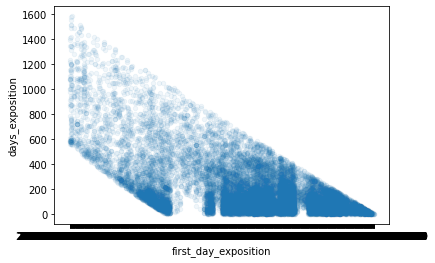

In [100]:
data.sort_values(by='first_day_exposition').plot(y='days_exposition', 
                                                 x='first_day_exposition', 
                                                 kind='scatter',
                                                 alpha=0.0625
                                                )

Можно по `first_day_exposition` вычислит `days_exposition`. Завершу позже. Сейчас исправлю критическое.

In [101]:
'''now = 2022 + 10 / 12 + 15 / 365.25
days=pd.DatetimeIndex(data['first_day_exposition']).dayofyear
years=pd.DatetimeIndex(data['first_day_exposition']).year
dates = (years + days /365.25) - now'''

# функция для воссоздания days_exposition по first_day_exposition
def days_exposition_correction(row):
    if np.isnan(row['days_exposition']):
        # заглушка
        return row['days_exposition']
    else:
        return row['days_exposition']

data['days_exposition']=data.apply(days_exposition_correction,axis=1)
data['days_exposition']

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

In [102]:
data['days_exposition']

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

#### Удаление пропусков - проверка результатов

Проверим, как много пропусков мы заполнили.

In [103]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest           5998
ponds_around3000           0
ponds_nearest           4938
days_exposition         3181
dtype: int64

Да, мы заполнили почти всё, что было в наших силах.

**Промежуточный вывод.** Работа с пропусками в данных позволяет восполнить значительную часть пробнлов, но не везде, к сожалению.

### Изменение типов данных

Для начала посмотрим на текущие типы данных.

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Изменим данные в `floors_total`

Количество этажей лучше измерять в целых числах. Изменим данные в `floors_total` на `int`.

In [105]:
data['floors_total'] = data['floors_total'].astype(int)

#### Изменим данные в `balcony`

Количество балконов лучше измерять в целых числах. Изменим данные в `balcony` на `int`.

In [106]:
 data['balcony'] = data['balcony'].astype(int)

#### Изменим данные в `parks_around3000`

Количество парков лучше измерять в целых числах. Изменим данные в `parks_around3000` на `int`.

In [107]:
 data['parks_around3000'] = data['parks_around3000'].astype(int)

#### Изменим данные в `ponds_around3000`

Количество прудов лучше измерять в целых числах. Изменим данные в `ponds_around3000` на `int`.

In [108]:
 data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Проверим результат.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Промежуточный вывод.** Изменение некоторых типов данных с вещественных на целые облегчит понимание, анализ и интерпретацию данных.

### Обработка дубликатов

Коррекция имён в `locality_name` была произведена выше, на этапе устранения пропускоа.

### Обработка редких значений и аномалий

#### Поиск аномалий в `ceiling_height`

Коррекция аномалий в `ceiling_height` была произведена выше, на этапе устранения пропускоа.

#### Поиск аномалий в `airports_nearest`

In [110]:
# посмотрим диапазон значений в airports_nearest
print(data['airports_nearest'].describe())
data['airports_nearest'].unique()

count    23699.000000
mean     29052.090679
std      11693.773328
min          0.000000
25%      21176.000000
50%      27179.000000
75%      35818.500000
max      84869.000000
Name: airports_nearest, dtype: float64


array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

Аномалий не обнаружено.

#### Поиск аномалий в `balcony`

In [111]:
# посмотрим диапазон значений в airports_nearest
print(data['balcony'].describe())
data['balcony'].unique()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


array([0, 2, 1, 5, 4, 3])

Аномалий не обнаружено.

#### Поиск аномалий в `cityCenters_nearest`

In [112]:
# посмотрим диапазон значений в cityCenters_nearest
print(data['cityCenters_nearest'].describe())
data['cityCenters_nearest'].unique()

count    23699.000000
mean     14213.486540
std       7685.228157
min        181.000000
25%      10913.500000
50%      13265.500000
75%      15743.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

Аномалий не обнаружено.

#### Поиск аномалий в `days_exposition`

In [113]:
# посмотрим диапазон значений в days_exposition
print(data['days_exposition'].describe())
data['days_exposition'].unique()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Аномалий не обнаружено.

#### Поиск аномалий в `first_day_exposition`

In [114]:
# посмотрим диапазон значений в first_day_exposition
print(data['first_day_exposition'].describe())
data['first_day_exposition'].unique()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

Аномалий не обнаружено.

#### Поиск аномалий в `floor`

In [115]:
# посмотрим диапазон значений в floor
print(data['floor'].describe())
data['floor'].unique()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Аномалий не обнаружено.

#### Поиск аномалий в `floors_total`

In [116]:
# посмотрим диапазон значений в floors_total
print(data['floors_total'].describe())
data['floors_total'].unique()

count    23699.000000
mean        10.678678
std          6.591239
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

Аномалий не обнаружено.

#### Поиск аномалий в `is_apartment`

In [117]:
# посмотрим диапазон значений в is_apartment
print(data['is_apartment'].describe())
data['is_apartment'].unique()

count     23699
unique        2
top       False
freq      23649
Name: is_apartment, dtype: object


array([False,  True])

Аномалий не обнаружено.

#### Поиск аномалий в `open_plan`

In [118]:
# посмотрим диапазон значений в open_plan
print(data['open_plan'].describe())
data['open_plan'].unique()

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object


array([False,  True])

Аномалий не обнаружено.

#### Поиск аномалий в `studio`

In [119]:
# посмотрим диапазон значений в studio
print(data['studio'].describe())
data['studio'].unique()

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object


array([False,  True])

Аномалий не обнаружено.

#### Поиск аномалий в `kitchen_area`

In [120]:
# посмотрим диапазон значений в kitchen_area
print(data['kitchen_area'].describe())
data['kitchen_area'].unique()

count    23699.000000
mean        10.856908
std          6.838110
min          0.000000
25%          7.000000
50%          9.245614
75%         12.000000
max        230.000000
Name: kitchen_area, dtype: float64


array([25.       , 11.       ,  8.3      , ..., 14.0877193, 13.83     ,
       27.       ])

Аномалий не обнаружено.

#### Поиск аномалий в `living_area`

In [121]:
# посмотрим диапазон значений в living_area
print(data['living_area'].describe())
data['living_area'].unique()

count    23699.000000
mean        34.912951
std         23.166199
min          2.000000
25%         19.000000
50%         30.000000
75%         42.500000
max        571.000000
Name: living_area, dtype: float64


array([51.        , 18.6       , 34.3       , ..., 42.55      ,
       45.88571429, 53.45      ])

Аномалий не обнаружено.

#### Поиск аномалий в `total_area`

In [122]:
# посмотрим диапазон значений в total_area
print(data['total_area'].describe())
data['total_area'].unique()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

Аномалий не обнаружено.

#### Поиск аномалий в `last_price`

In [123]:
# посмотрим диапазон значений в last_price
print(data['last_price'].describe())
data['last_price'].unique()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [124]:
for price in data['last_price'].unique():
    if price < 1000000:
        print(price)

800000.0
650000.0
900000.0
790000.0
980000.0
950000.0
850000.0
550000.0
750000.0
999000.0
990000.0
600000.0
720000.0
500000.0
700000.0
770000.0
710000.0
760000.0
450000.0
820000.0
945750.0
490000.0
780000.0
777000.0
970000.0
585000.0
690000.0
560000.0
620000.0
12190.0
910000.0
730000.0
580000.0
630000.0
880000.0
869000.0
530000.0
995000.0
565000.0
430000.0
870000.0
590000.0
480000.0
440000.0
920000.0
999999.0
660000.0
680000.0
860000.0
965780.0
470000.0
890000.0
520000.0
740000.0
799000.0


Создадим функцию, кторая заменит маленькие цены, увеличив их хотя бы до миллиона.

In [125]:
# исправим аномалии
def last_price_correction(last_price):
    try:
        if last_price < 100000:
            return last_price * 100
        if last_price < 1000000:
            return last_price * 10
        return last_price
    except:
        pass
    
data['last_price'] = data['last_price'].apply(last_price_correction)

Аномалия устранена.

#### Поиск аномалий в `parks_around3000`

In [126]:
# посмотрим диапазон значений в last_price
print(data['parks_around3000'].describe())
data['parks_around3000'].unique()

count    23699.000000
mean         0.469134
std          0.748593
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


array([1, 0, 2, 3])

Аномалий не обнаружено.

#### Поиск аномалий в `parks_nearest`

In [127]:
# посмотрим диапазон значений в parks_nearest
print(data['parks_nearest'].describe())
data['parks_nearest'].unique()

count    17701.000000
mean       475.959353
std        235.377977
min          1.000000
25%        428.500000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 7.330e+02,
       4.600e+02, 3.100e+02, 4.070e+02, 2.940e+02, 3.995e+02, 5.900e+02,
       4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02, 4.110e+02, 4.520e+02,
       5.320e+02, 3.930e+02, 4.590e+02, 7.250e+02, 4.700e+01, 6.200e+02,
       6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02, 6.480e+02,
       3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02, 5.110e+02,
       7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02, 4.880e+02,
       1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01, 2.150e+02,
       3.670e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       4.285e+02, 7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03,
       1.205e+03, 5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02,
       5.910e+02, 2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02,
       3.700e+02, 6.880e+02, 2.750e+02, 5.460e+02, 

Аномалий не обнаружено.

#### Поиск аномалий в `ponds_around3000`

In [128]:
# посмотрим диапазон значений в ponds_around3000
print(data['ponds_around3000'].describe())
data['ponds_around3000'].unique()

count    23699.000000
mean         0.643614
std          0.904877
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


array([2, 0, 3, 1])

Аномалий не обнаружено.

#### Поиск аномалий в `ponds_nearest`

In [129]:
# посмотрим диапазон значений в ponds_nearest
print(data['ponds_nearest'].describe())
data['ponds_nearest'].unique()

count    18761.000000
mean       498.064122
std        207.392202
min         13.000000
25%        440.000000
50%        503.000000
75%        552.000000
max       1344.000000
Name: ponds_nearest, dtype: float64


array([ 755. ,  584.5,  574. , ...,  959. ,   40. , 1134. ])

Аномалий не обнаружено.

#### Поиск аномалий в `rooms`

In [130]:
# посмотрим диапазон значений в rooms
print(data['rooms'].describe())
data['rooms'].unique()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Аномалий не обнаружено.

#### Поиск аномалий в `total_images`

In [131]:
# посмотрим диапазон значений в total_images
print(data['total_images'].describe())
data['total_images'].unique()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Аномалий не обнаружено.

**Предварительный вывод.** В большинстве случаев аномалий нет или они устрванены.

## Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [132]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_meter, Length: 23699, dtype: float64

#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [133]:
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['week_day']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: week_day, Length: 23699, dtype: int64

#### Месяц публикации объявления

In [134]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64

#### Год публикации объявления

In [135]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64

#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [136]:
def floor_group(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'первый'
    if what_floor==total_floor:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_group,axis=1)
data['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23699, dtype: object

Типы этажей успешно добавлены.

#### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [137]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype(int)
data['cityCenters_nearest_km']

0        16
1        18
2        13
3         6
4         8
         ..
23694     4
23695    13
23696    13
23697    10
23698    13
Name: cityCenters_nearest_km, Length: 23699, dtype: int64

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23699 non-null  int64  
 1   last_price              23699 non-null  float64
 2   total_area              23699 non-null  float64
 3   first_day_exposition    23699 non-null  object 
 4   rooms                   23699 non-null  int64  
 5   ceiling_height          23699 non-null  float64
 6   floors_total            23699 non-null  int64  
 7   living_area             23699 non-null  float64
 8   floor                   23699 non-null  int64  
 9   is_apartment            23699 non-null  bool   
 10  studio                  23699 non-null  bool   
 11  open_plan               23699 non-null  bool   
 12  kitchen_area            23699 non-null  float64
 13  balcony                 23699 non-null  int64  
 14  locality_name           23699 non-null

Всё верно.

**Промежуточный вывод.** Добавление новых столбцов позволяет категоризировать данные и расширить их потенциал. Это помогает улучшить анализ.

## Проведите исследовательский анализ данных

### Изучение параметров объектов

#### Общая площадь

<AxesSubplot:>

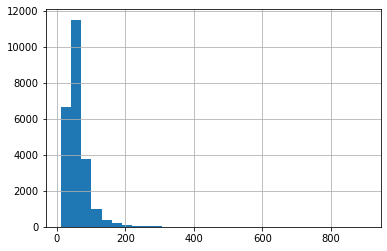

In [139]:
data['total_area'].hist(bins=30)

Такой масштаб не подходит. Возьмём покрупней.

<AxesSubplot:>

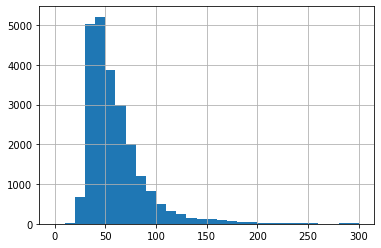

In [140]:
data['total_area'].hist(bins=30, range=(0, 300))

Большинство представленных объектов имеют общую площадь `30-40` кв.м. Менее распространённые предложения имеют `50-60` кв.м. Совсем редкими являются предложения `200-300` или даже `800` кв.м.

#### Жилая площадь

<AxesSubplot:>

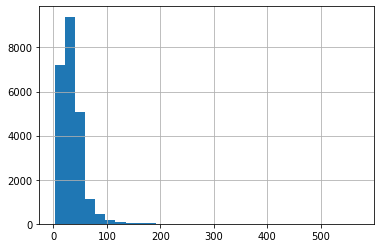

In [141]:
data['living_area'].hist(bins=30)

Такой масштаб не подходит. Возьмём покрупней.

<AxesSubplot:>

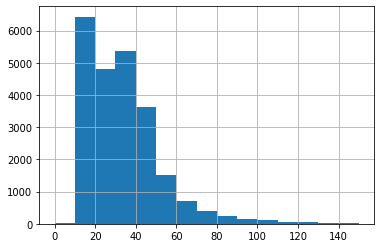

In [142]:
data['living_area'].hist(bins=15, range=(0, 150))

Основную часть предложений составляют объекты с жилой площадью `20-40` кв.м.

#### Площадь кухни

<AxesSubplot:>

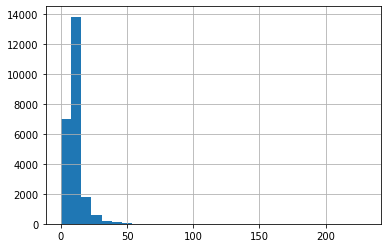

In [143]:
data['kitchen_area'].hist(bins=30)

Такой масштаб не подходит. Возьмём покрупней.

<AxesSubplot:>

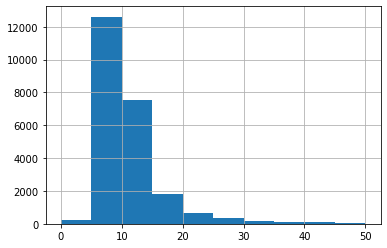

In [144]:
data['kitchen_area'].hist(bins=10, range=(0, 50))

Основную часть предложений составляют объекты с площадью кухни `10-15` кв.м.

#### Цена объекта

Диапазон цен на недвижимость.

In [145]:
data['last_price'].sort_values().unique()

array([1.000e+06, 1.010e+06, 1.020e+06, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

<AxesSubplot:>

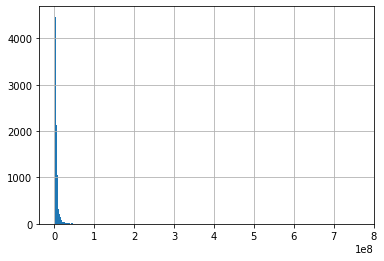

In [146]:
data['last_price'].hist(bins=800)

Такой масштаб не подходит. Возьмём диапазон до `45,000,000` руб.

<AxesSubplot:>

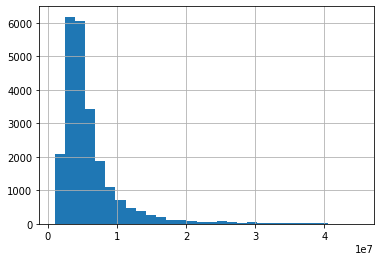

In [147]:
data['last_price'].hist(bins=30, range=(1000000, 45000000))

Уже лучше. Видно, что есть ряд не очень распространённыйх предложений от `30` др `40` млн. руб. 

Возьмём диапазон до 30,000,000 руб.

<AxesSubplot:>

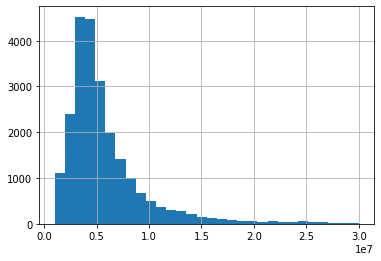

In [148]:
data['last_price'].hist(bins=30, range=(1000000, 30000000))

Как видно, основную часть составляют предложения с ценой `3-5` млн. руб.

#### Количество комнат

<AxesSubplot:>

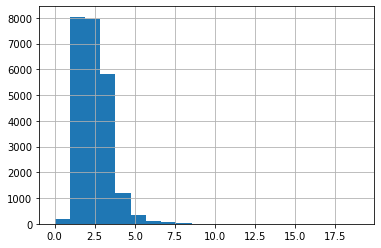

In [149]:
data['rooms'].hist(bins=20)

Самое типичное объявление о продаже двухкомнатной квартиры.

#### Высота потолков

<AxesSubplot:>

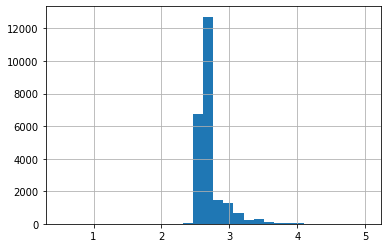

In [150]:
data['ceiling_height'].hist(bins=30)

В нашем городе крайне распространены стандартные потолки высотой около `2,5` м. Есть и очень низкме, есть и дореволюционные постройки, с высокими потолками.

#### Этаж квартиры

<AxesSubplot:>

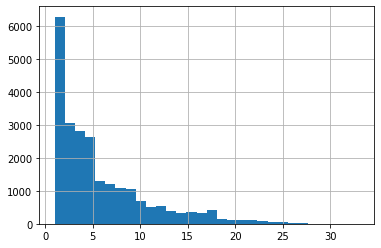

In [151]:
data['floor'].hist(bins=30)

Наибольшее количество объектов для продажи находятся на нижних этажах (1-5 этаж). С небольшим отставанием идут 6-10 этажи. Неудивительно, ведь у нас в городе распространены низкие здания. Хотя, возможно, все боятся наводнений :)

#### Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

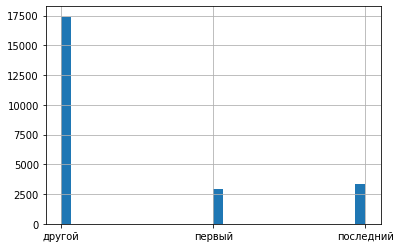

In [152]:
data['floor_type'].hist(bins=30)

Полавляющее большинство этажей не являются ни первыми, ни последними, что вполне ожидаемо.

#### Общее количество этажей в доме

<AxesSubplot:>

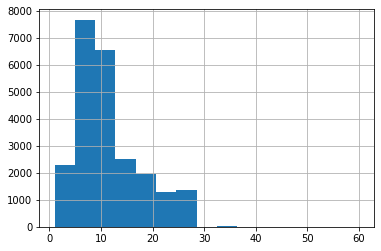

In [153]:
data['floors_total'].hist(bins=15)

Большее количество объявлений имеет `6-15` этажей. Это отражает наиболее типичную высоту зданий в городе. «Правила об ограничении постройки в Санкт-Петербурге высоких зданий и надстроек этажей на существующих зданиях» не прошли незамеченными.

<AxesSubplot:>

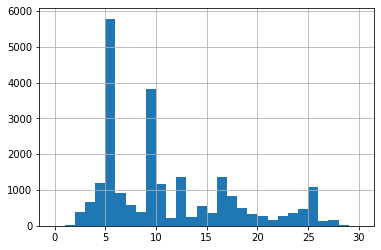

In [154]:
data['floors_total'].hist(bins=30, range=(0,30))

Да, видно, что здания с 5-ю, 9-ю встречвются очеь часто. 10-и, 16-и 26-и этажные дома так же тиаичны. 

#### Расстояние до центра города в метрах

<AxesSubplot:>

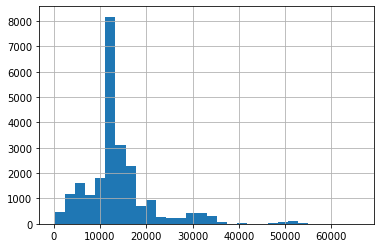

In [155]:
data['cityCenters_nearest'].hist(bins=30)

Оснновная часть предложений сосредоточена в диапазоне `10-15,000` м (большинство `12,000`) метров от центра города. Вокруг этого значения расположена большинство объявлений. Объекиов на рвссирянии `5,000` м также достаточно много. Совсем мало предложений на расстоянии `30,000` м и `50,000` м.

#### Расстояние до ближайшего аэропорта

<AxesSubplot:>

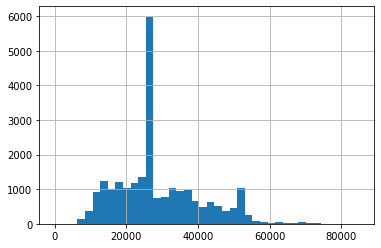

In [156]:
data['airports_nearest'].hist(bins=40)

Очень много предложений расположены достаточно далеко от аэропорта - `10-40` км. Это не удивительно, учитывая предыдущий график, из которого видно, что большинство объявлений - недалеко от центра города.

#### Расстояние до ближайшего парка

<AxesSubplot:>

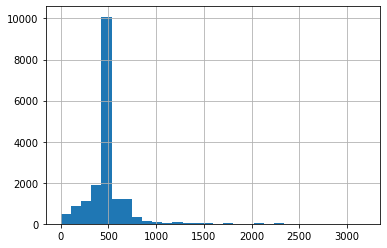

In [157]:
data['parks_nearest'].hist(bins=30)

В нашем городе достаточно много парков. Неудивительно, что очень много объявлений находятся в 500 м или даже меньше от ближайшего из них.

#### День и месяц публикации объявления

<AxesSubplot:>

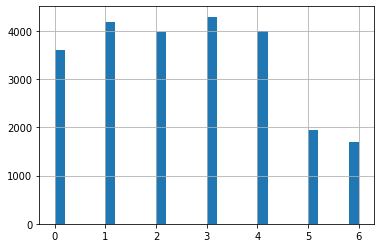

In [158]:
data['week_day'].hist(bins=30)

Видно, что большая часть объявлений о продаже подаётся по будням, а не по выходным.

<AxesSubplot:>

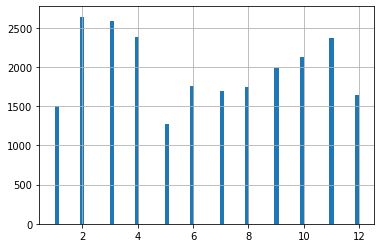

In [159]:
data['month'].hist(bins=72)

Очень много объявлений о продаже подаётся в конце зимы-начале весны и осенью. В периоды летних отпускоа и новогодних праздников их подаётся меньше.

**Промежуточный вывод.**  
На основании данных, можно сказать, что:

- большинство представленных объектов имеют общую площадь `30-40` кв.м.;
- основную часть предложений составляют объекты с жилой площадью `20-40` кв.м.;
- основную часть предложений составляют объекты с площадью кухни `10-15` кв.м.;
- основную часть составляют предложения с ценой `3-5` млн. руб.;
- самое типичное объявление о продаже двухкомнатной квартиры;
- крайне распространены стандартные потолки высотой около `2,5` м. 
- наибольшее количество объектов для продажи находятся на нижних этажах (1-5 этажм, затем 6-10 этажи);
- большинство этажей не являются ни первыми, ни последними.
- большее количество объявлений имеют 6-15 этажей. Здания с 5-ю, 9-ю встречвются очеь часто. 10-и, 16-и 26-и этажные дома так же тиаичны;
- оснновная часть предложений сосредоточена в диапазоне `10-15,000` м от центра города;
- очень много предложений расположены достаточно далеко от аэропорта - 10-40 км;
- очень много предложений находятся в 500 м или даже меньше от ближайшего парка;
- большая часть объявлений о продаже подаётся по будням, а не по выходным;
- в периоды летних отпускоа и новогодних праздников подаётся меньш объявлений о продаже.

### Изучение объявлений `days_exposition`

<AxesSubplot:>

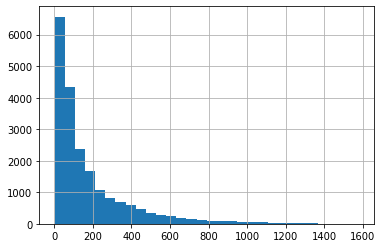

In [160]:
data['days_exposition'].hist(bins=30)

In [161]:
print('Среднее', data['days_exposition'].mean())
print('Медиана', data['days_exposition'].median())

Среднее 180.88863436982163
Медиана 95.0


**Вопрос:** Сколько времени обычно занимает продажа? Какие продажи можно считать быстрыми, а какие — необычно долгими?

**Ответ:** Обычно продажа занимает 3-6 месяцев. Очень быстрые предложения покупают быстрее, чем за 3 месяца. Необычано долгие продажи могут длиться более 200 дней. Некоторые продажи длятся более 4 лет.

### Изучение цены

В этом разделе мы изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

#### Изучим, зависит ли цена от общей площадь

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

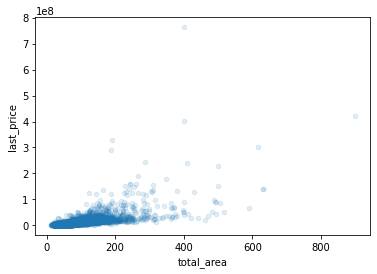

In [162]:
data.plot(y='last_price', x='total_area', kind='scatter', alpha=0.125)

In [163]:
print('Корреляция цены и общей площаи', data['last_price'].corr(data['total_area']))

Корреляция цены и общей площаи 0.6513534447266865


**Ответ.** Да, цена объекта значительно зависит от его общей площади.

#### Изучим, зависит ли цена от жилой площади

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

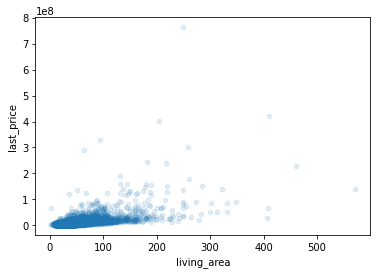

In [164]:
data.plot(y='last_price', x='living_area', kind='scatter', alpha=0.125)

In [165]:
print('Корреляция цены и жилой площали', data['last_price'].corr(data['living_area']))

Корреляция цены и жилой площали 0.5812634765223903


**Ответ.** Да, цена объекта зависит от его жилой площади.

#### Изучим, зависит ли цена от площади кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

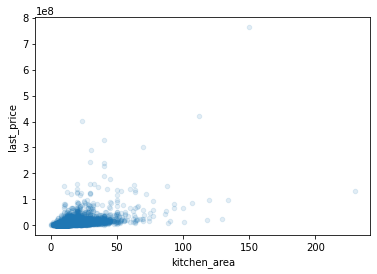

In [166]:
data.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.125)

In [167]:
print('Корреляция цены и площали кухни', data['last_price'].corr(data['kitchen_area']))

Корреляция цены и площали кухни 0.5042400255955272


**Ответ.** Да, цена объекта зависит от площади кухни, но слабо.

#### Изучим, зависит ли цена от количества комнат

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

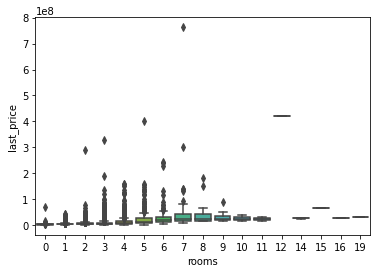

In [168]:
# data.boxplot(y='last_price', x='rooms')
sns.boxplot(data=data, x='rooms', y='last_price')

В среднем, с увеличением количества комнат, цена жилья увеличиватся. Однако наибольший разброс цен можно наблюдать среди объявлений с 4-7-ми комнатами.

In [169]:
grouped_data = data.groupby('rooms')
rooms_last_price_median = grouped_data['last_price'].agg('median')
rooms_last_price_mean = grouped_data['last_price'].agg('mean')

<AxesSubplot:xlabel='rooms'>

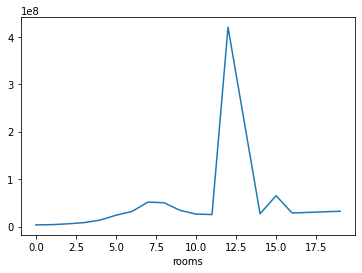

In [170]:
rooms_last_price_mean.plot()

<AxesSubplot:xlabel='rooms'>

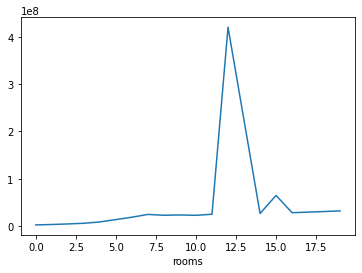

In [171]:
rooms_last_price_median.plot()

In [172]:
print('Корреляция цены и количества комнат', data['last_price'].corr(data['rooms']))

Корреляция цены и количества комнат 0.3617790048696562


**Ответ.** Да, цена объекта зависит от количества комнат. Объекты с большим числом комнат в среднем дороже, чем те, где комнат мало.

#### Изучим, зависит ли цена от этажа, на котором расположена квартира

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

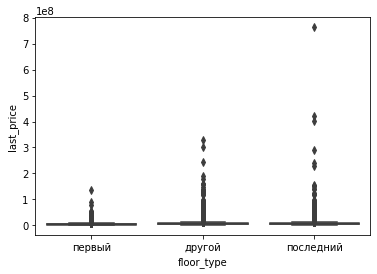

In [173]:
sns.boxplot(data=data, x='floor_type', y='last_price', order=['первый', 'другой', 'последний'])

In [174]:
grouped_data = data.groupby('floor_type')
floor_type_last_price_median = grouped_data['last_price'].agg('median')
floor_type_last_price_mean = grouped_data['last_price'].agg('mean')

<AxesSubplot:xlabel='floor_type'>

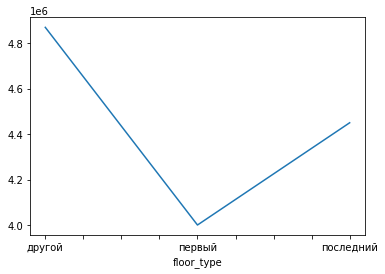

In [175]:
floor_type_last_price_median.plot()

<AxesSubplot:xlabel='floor_type'>

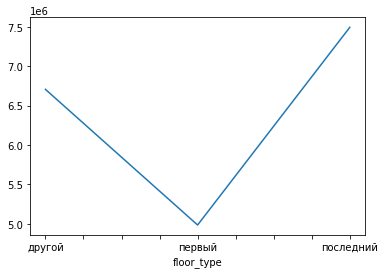

In [176]:
floor_type_last_price_mean.plot()

**Ответ.** Да, цена объекта зависит от типа этажа, на котором расположена квартира. Первые этажи значительно дешевле других, поскольку, как это было указано выше, их преложений на рынке очень много.

#### Изучим, зависит ли цена от  даты размещения

<AxesSubplot:xlabel='week_day', ylabel='last_price'>

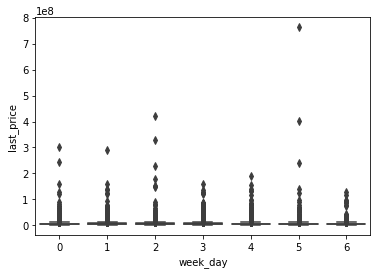

In [177]:
sns.boxplot(data=data, x='week_day', y='last_price')

In [178]:
grouped_data = data.groupby('week_day')
week_price_median = grouped_data['last_price'].agg('median')
week_price_mean = grouped_data['last_price'].agg('mean')

<AxesSubplot:xlabel='week_day'>

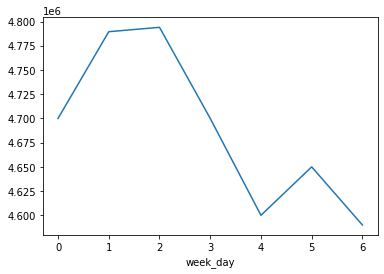

In [179]:
week_price_median.plot()

В начале недели поступают предложения с ценой в среднем выше на `200,000` руб. Это не так значительно, учитывая маштаб цен в миллионах рублей, хотя и значимо для конкретного поупаткля.

<AxesSubplot:xlabel='week_day'>

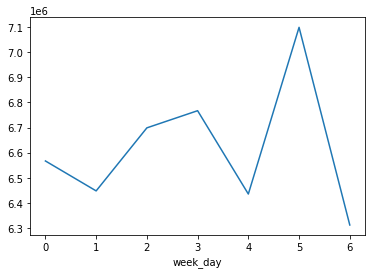

In [180]:
week_price_mean.plot()

In [181]:
print('Корреляция цены и дня недели', data['last_price'].corr(data['week_day']))

Корреляция цены и дня недели 0.002427342461355567


<AxesSubplot:xlabel='month', ylabel='last_price'>

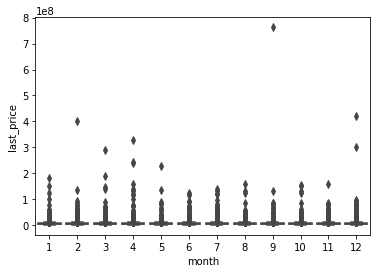

In [182]:
sns.boxplot(data=data, x='month', y='last_price')

In [183]:
grouped_data = data.groupby('month')
month_price_median = grouped_data['last_price'].agg('median')
month_price_mean = grouped_data['last_price'].agg('mean')

<AxesSubplot:xlabel='month'>

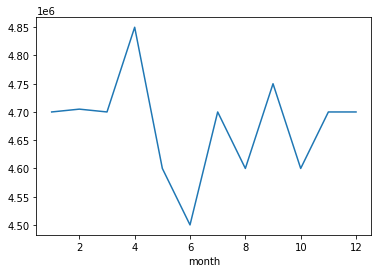

In [184]:
month_price_median.plot()

<AxesSubplot:xlabel='month'>

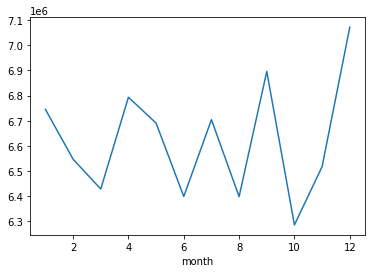

In [185]:
month_price_mean.plot()

In [186]:
print('Корреляция цены и месяцат', data['last_price'].corr(data['month']))

Корреляция цены и месяцат 0.0021393115164951796


<AxesSubplot:xlabel='year', ylabel='last_price'>

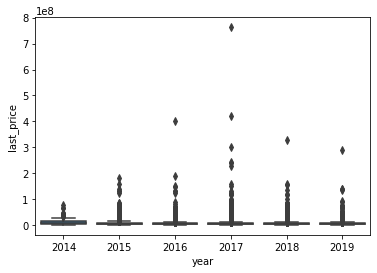

In [187]:
sns.boxplot(data=data, x='year', y='last_price')

In [188]:
grouped_data = data.groupby('year')
year_price_median = grouped_data['last_price'].agg('median')
year_price_mean = grouped_data['last_price'].agg('mean')

<AxesSubplot:xlabel='year'>

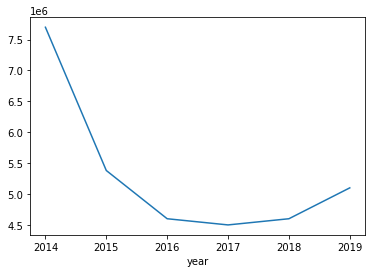

In [189]:
year_price_median.plot()

<AxesSubplot:xlabel='year'>

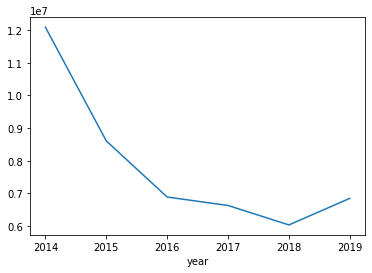

In [190]:
year_price_mean.plot()

In [191]:
print('Корреляция цены и года', data['last_price'].corr(data['year']))

Корреляция цены и года -0.04200031898389778


Есть небольшая тенденция, что после 2016-го года недвижимость силь подешевела.

**Ответ.** Нет, цена объекта не зависит от даты размещения.

**Предварительный вывод.** Цена объекта зависит в основном:

- от его общей площади;
- от жилой площади;
- от количества комнат;
- типа этажа; 

Цена объекта не зависит:

- от площади кухни;
- от даты размещения объявления.

### Cредняя цена одного квадратного метра в 10 населённых пунктах

In [192]:
# узнаем список 10 самых популярных населённых пунктах
top_10_list = list(data['locality_name'].value_counts().index[:10])
top_10_list

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

In [193]:
top_10 = data.query('locality_name in @top_10_list').pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
top_10 = round(top_10, 0)
top_10.sort_values(by='price_per_meter', ascending=False)

,price_per_meter
locality_name,
Санкт-Петербург,114850.0
Пушкин,103126.0
Кудрово,95325.0
Парголово,90176.0
Мурино,86088.0
Шушары,78677.0
Колпино,75425.0
Всеволожск,69625.0
Гатчина,69066.0


**Промежуточный вывод.** Самая дорогая недвижимость среди 10 самых популярных населённых пунктов, естественно, находится в черте города, в самом Санкт-Петербурге. Следующим идёт Пушкин. Видно, что наиболее популярные и дорогие квадратные метры расположены в центре города и в некоторых пунктах Ленболасти, в основном на Севере (Выборг, Мурино, Всеволожск, Парголово) и на Юге (Пкшкин, Гатчина, Шушары, Колпино).

### Средняя цена каждого киллометра

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price'>

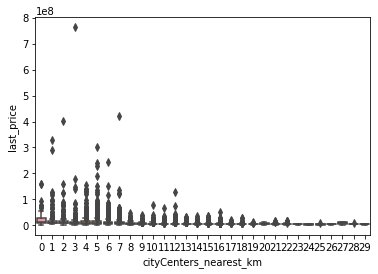

In [194]:
sns.boxplot(data=data[data['locality_name']== 'Санкт-Петербург'], x='cityCenters_nearest_km', y='last_price')

**Вопрос:** как стоимость объектов зависит от расстояния до центра города?

In [195]:
grouped_data = data[data['locality_name']== 'Санкт-Петербург'].groupby('cityCenters_nearest_km')

last_price_mean = grouped_data['last_price'].agg('mean')
last_price_median = grouped_data['last_price'].agg('median')

<AxesSubplot:xlabel='cityCenters_nearest_km'>

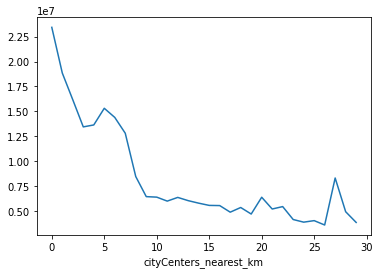

In [196]:
last_price_mean.plot()

<AxesSubplot:xlabel='cityCenters_nearest_km'>

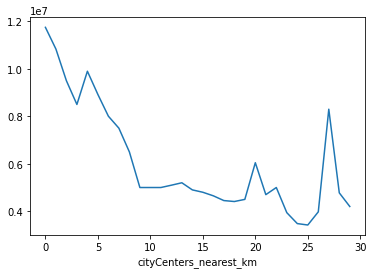

In [197]:
last_price_median.plot()

**Ответ:** Чем дальше объект от центра города, тем его цена ниже. Причём в самом центре разнообразие цен выше, чем на периферии города. Дорогая недвижимость в основном заканчивается прсле `10` км от центра. Есть также ценовое повышение на расстоянии `20` и `27` км.

## Общий вывод

**1. Загрузка файла с данными и изучение общей информации** 

Все данные загружаются нормально. Основная информация выведена на экран.  Общие гистограммы построены.

**2. Предобработка данных**

**2.1  Удаление пропусков**

Работа с пропусками в данных позволяет восполнить значительную часть пробнлов, но не везде, к сожалению.

**2.2  Изменение типов данных**

Изменение некоторых типов данных с вещественных на целые облегчит понимание, анализ и интерпретацию данных.

**2.3  Обработка дубликатов**

Все дубликаты в названиях населённых пунктов устранены.

**2.4. Обработка редких значений и аномалий**

В большинстве случаев аномалий нет или они устрванены.

**3. Добавление в таблицу новых столбцов**

Добавление новых столбцов позволяет категоризировать данные и расширить их потенциал. Это помогает улучшить анализ.

**4. Исследовательский анализ.**

**4.1.  Изучение параметров объектов**

На основании данных, можно сказать, что:
- большинство представленных объектов имеют общую площадь 30-40 кв.м.;
- основную часть предложений составляют объекты с жилой площадью 20-40 кв.м.;
- основную часть предложений составляют объекты с площадью кухни 10-15 кв.м.;
- основную часть составляют предложения с ценой 3-5 млн. руб.;
- самое типичное объявление о продаже двухкомнатной квартиры;
- крайне распространены стандартные потолки высотой около 2,5 м.
- наибольшее количество объектов для продажи находятся на нижних этажах (1-5 этажм, затем 6-10 этажи);
- большинство этажей не являются ни первыми, ни последними.
- большее количество объявлений имеют 6-15 этажей. Здания с 5-ю, 9-ю встречвются очеь часто. 10-и, 16-и 26-и этажные дома так же тиаичны;
- оснновная часть предложений сосредоточена в диапазоне 10-15,000 м от центра города;
- очень много предложений расположены достаточно далеко от аэропорта - 10-40 км;
- очень много предложений находятся в 500 м или даже меньше от ближайшего парка;
- большая часть объявлений о продаже подаётся по будням, а не по выходным;
- в периоды летних отпускоа и новогодних праздников подаётся меньш объявлений о продаже.

**4.2.  Изучение объявлений `days_exposition`**

Обычно продажа занимает 3-6 месяцев. Очень быстрые предложения покупают быстрее, чем за 3 месяца. Необычано долгие продажи могут длиться более 200 дней. Некоторые продажи длятся более 4 лет.

**4.3. Изучение цены**

Мы изучили, какие факторы больше всего влияют на общую (полную) стоимость объекта 

Цена объекта зависит в основном:

- от его общей площади;
- от жилой площади;
- от количества комнат;
- типа этажа; 

Цена объекта не зависит:

- от площади кухни;
- от даты размещения объявления.

**4.4.  Cредняя цена одного квадратного метра в 10 населённых пунктах**

Самая дорогая недвижимость среди 10 самых популярных населённых пунктов, естественно, находится в черте города, в самом Санкт-Петербурге. Следующим идёт Пушкин. Видно, что наиболее популярные и дорогие квадратные метры расположены: 
- в центре города (Санкт-Петербург);
- на Севере (Выборг, Мурино, Всеволожск, Парголово);
- на Юге (Пкшкин, Гатчина, Шушары, Колпино).

**4.5  Средняя цена каждого киллометра**

Чем дальше объект от центра города, тем его цена ниже. Причём в самом центре разнообразие цен выше, чем на периферии города. Дорогая недвижимость в основном заканчивается прсле `10` км от центра. Есть также ценовое повышение на расстоянии `20` и `27` км.